In [1]:
pip install deepxde

Defaulting to user installation because normal site-packages is not writeable
  Using cached DeepXDE-1.12.1-py3-none-any.whl (184 kB)
  Using cached scikit_optimize-0.10.2-py2.py3-none-any.whl (107 kB)
     |████████████████████████████████| 13.4 MB 4.9 MB/s eta 0:00:01    |███▌                            | 1.4 MB 4.9 MB/s eta 0:00:03
  Using cached pyaml-24.7.0-py3-none-any.whl (24 kB)
     |████████████████████████████████| 19.5 MB 105.1 MB/s eta 0:00:01
     |████████████████████████████████| 53 kB 2.3 MB/s s eta 0:00:01
     |████████████████████████████████| 301 kB 124.9 MB/s eta 0:00:01
     |████████████████████████████████| 16.8 MB 106.4 MB/s eta 0:00:01
  distutils: /users/eleves-b/2022/issame.maghraoui/.local/lib/python3.9/site-packages
  sysconfig: /users/eleves-b/2022/issame.maghraoui/.local/lib64/python3.9/site-packages
  user = True
  home = None
  root = None
  prefix = None
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 13.1 MB 5.2 MB/s eta 0:00:01
     |████████████████████████████████| 345 kB 146.2 MB/s eta 0:00:01
     |████████████████████████████████| 505 kB 187.8 MB/s eta 0:00:01
  distutils: /users/eleves-b/2022/issame.maghraoui/.local/lib/python3.9/site-packages
  sysconfig: /users/eleves-b/2022/issame.maghraoui/.local/lib64/python3.9/site-packages
  user = True
  home = None
  root = None
  prefix = None
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install torch

Defaulting to user installation because normal site-packages is not writeable
  Using cached torch-2.4.0-cp39-cp39-manylinux1_x86_64.whl (797.2 MB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached fsspec-2024.6.1-py3-none-any.whl (177 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached networkx-3.2.1-py3-none-any.whl (1.6 MB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl (664.8 MB)
  Using cached jinja2-3.1.4-py3-none-any.whl (133 kB)
  distutils: /users/eleves-b/2022/issame.maghraoui/.local/lib/python3.9/site-packages
  sysconfig: /users/eleves-b/2022/issame.maghraoui/.local/lib64/python3.9/site-packages
  user = True
  home = None
  root = None
  prefix = None
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import scipy
import torch

**The data from Paraview**

In [2]:
# Chemin vers le fichier CSV
file_path = 'data (1).csv'

# Lire le fichier CSV
data2 = pd.read_csv(file_path)

# Afficher les premières lignes du DataFrame
print(data2.head())


   Time  Points:0  Points:1  Points:2  Pressure  Velocity:0  Velocity:1  \
0   0.0 -0.008839  0.008839       0.0       0.0         1.0      0.0001   
1   0.0  0.008839  0.008839       0.0       0.0         1.0      0.0001   
2   0.0  0.008839 -0.008839       0.0       0.0         1.0      0.0001   
3   0.0 -0.008839 -0.008839       0.0       0.0         1.0      0.0001   
4   0.0 -0.055000  0.055000       0.0       0.0         1.0      0.0001   

   Velocity:2  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  


In [3]:

# Extraction des colonnes
Time = data2['Time']
X = data2['Points:0']
Y = data2['Points:1']
U = data2['Velocity:0']
V = data2['Velocity:1']

# Empilement des vitesses en une seule matrice
U_star = np.vstack((U, V))

# Trier les données par les colonnes X, Y, Time dans cet ordre
data_sorted = data2.sort_values(by=['Points:0', 'Points:1', 'Time'])

# Afficher les premières lignes du DataFrame trié
print(data_sorted.head())


           Time  Points:0  Points:1  Points:2  Pressure  Velocity:0  \
9613   0.000000 -0.087208  0.052678 -0.000000  0.000000     1.00000   
17965  0.000000 -0.087208  0.052678  0.001875  0.000000     1.00000   
27579  0.024543 -0.087208  0.052678 -0.000000  0.061768     0.99257   
35931  0.024543 -0.087208  0.052678  0.001875  0.061768     0.99257   
45545  0.049086 -0.087208  0.052678 -0.000000  0.062831     0.99033   

       Velocity:1    Velocity:2  
9613     0.000100  0.000000e+00  
17965    0.000100  0.000000e+00  
27579    0.020831  6.634200e-18  
35931    0.020831  6.634200e-18  
45545    0.024574  8.779900e-18  


In [4]:
Time = data2['Time']
X = data2['Points:0']
Y = data2['Points:1']
U = data2['Velocity:0']
V = data2['Velocity:1']
U_star = np.vstack((U,V))


In [5]:
print(U_star.shape)

(2, 5874882)


In [6]:
# Check for missing values
missing_values = data2.isnull().sum()
print(missing_values)

# Handle missing values
# Option 1: Drop rows with missing values
data2_clean = data2.dropna()

# Option 2: Fill missing values (e.g., with mean or interpolation)
data2_clean = data2.fillna(data2.mean())


Time          0
Points:0      0
Points:1      0
Points:2      0
Pressure      0
Velocity:0    0
Velocity:1    0
Velocity:2    0
dtype: int64


In [7]:
X_unique = X.drop_duplicates().reset_index(drop=True)
T_unique = Time.drop_duplicates().reset_index(drop=True)
N = X_unique.shape[0]
T = T_unique.shape[0]
print(N,T)

4134 327


In [8]:
print(X.shape)
print(Y.shape)
print(Time.shape)
print(U.shape)
print(V.shape)
print(X.shape[0])

(5874882,)
(5874882,)
(5874882,)
(5874882,)
(5874882,)
5874882


**Normalization of the data**

I couldn't extract meaningful details from the data initially. After performing some preprocessing, including reordering and normalizing it, I was finally able to visualize it effectively.

In [9]:
x = X.to_numpy()
y = Y.to_numpy()
t = Time.to_numpy()
u = U.to_numpy()
v = V.to_numpy()
'''
x = x[x >= -0.05 ]
y = y[(y >= -0.1) & (y <= 0.1)]

print(y.max(), y.min(), x.max(), x.min())
'''

x = x.flatten()[:,None]
y = y.flatten()[:,None]
t = t.flatten()[:,None]
u = u.flatten()[:,None]
v = v.flatten()[:,None]

x_min, x_max = x.min(), x.max()
y_min, y_max = y.min(), y.max()

x = (x - x_min) / (x_max - x_min)
y = (y - y_min) / (y_max - y_min)

# Z-Score Normalization for u and v
u_mean, u_std = u.mean(), u.std()
v_mean, v_std = v.mean(), v.std()

u = (u - u_mean) / u_std
v = (v - v_mean) / v_std

x_min, x_max = x.min(), x.max()
y_min, y_max = y.min(), y.max()
print(y.min())
print(y.max())

0.0
1.0


**Uniform Sampling**

MovieWriter imagemagick unavailable; using Pillow instead.


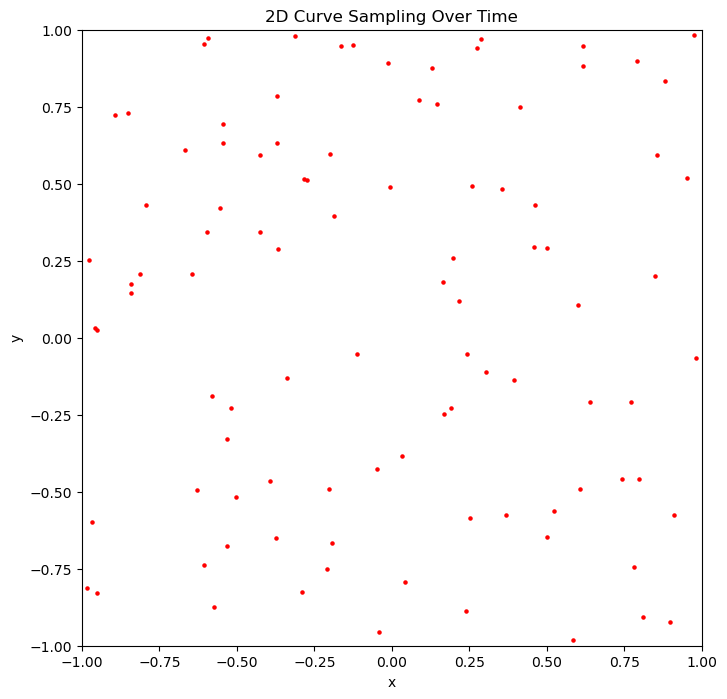

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Generate sample data
n_points = 100000  # Total number of points
x = np.random.rand(n_points, 1) * 2 - 1  # x coordinates in range [-1, 1]
y = np.random.rand(n_points, 1) * 2 - 1  # y coordinates in range [-1, 1]
t = np.random.rand(n_points, 1) * 10  # t coordinates in range [0, 10]

# Combine x, y, and t into a single array for easy indexing
coordinates = np.hstack((x, y, t))

# Training set parameters
N_train = 5000
step = coordinates.shape[0] // N_train
idx = np.arange(0, step * N_train, step)

# Select training points
train_coords = coordinates[idx, :]

# Create the figure and axis for the animation
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_xlabel('x')
ax.set_ylabel('y')

# Initialize the scatter plot
scatter = ax.scatter([], [], c='red', s=5)

# Animation function
def animate(i):
    time_slice = i * 0.1  # Adjust the time step as needed
    # Filter points based on the current time slice
    current_points = train_coords[np.abs(train_coords[:, 2] - time_slice) < 0.1]
    scatter.set_offsets(current_points[:, :2])  # Update x and y positions
    return scatter,

# Create the animation
anim = FuncAnimation(fig, animate, frames=np.arange(0, 10, 0.1), interval=100)
anim.save('sampl.gif', writer='imagemagick')

# Display the animation
plt.show()


In [10]:
import deepxde as dde
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.animation as animation

nu = 0.0006
rho = 1.2

def pde(x, y):
    u, v, p = y[:, 0:1], y[:, 1:2], y[:, 2:3]
    u_t = dde.grad.jacobian(y, x, i=0, j=2)
    v_t = dde.grad.jacobian(y, x, i=1, j=2)
    u_x = dde.grad.jacobian(y, x, i=0, j=0)
    u_y = dde.grad.jacobian(y, x, i=0, j=1)
    v_x = dde.grad.jacobian(y, x, i=1, j=0)
    v_y = dde.grad.jacobian(y, x, i=1, j=1)
    u_xx = dde.grad.hessian(y, x, component=0, i=0, j=0)
    u_yy = dde.grad.hessian(y, x, component=0, i=1, j=1)
    v_xx = dde.grad.hessian(y, x, component=1, i=0, j=0)
    v_yy = dde.grad.hessian(y, x, component=1, i=1, j=1)
    p_x = dde.grad.jacobian(y, x, i=2, j=0)
    p_y = dde.grad.jacobian(y, x, i=2, j=1)

    f = rho*(u_t + u * u_x + v * u_y )+ p_x - nu * (u_xx + u_yy)
    g = rho*(v_t + u * v_x + v * v_y )+ p_y - nu * (v_xx + v_yy)
    h = u_x + v_y
    return [f, g, h]

N_train = 10000
step = x.shape[0] // N_train

idx = np.arange(0, step * N_train, step)

# Créer les ensembles d'entraînement
x_train = x[idx, :]
y_train = y[idx, :]
t_train = t[idx, :]
u_train = u[idx, :]
v_train = v[idx, :]


# Define geometry and time domain
geom = dde.geometry.Rectangle([x.min(), y.min()], [x.max(), y.max()])
timedomain = dde.geometry.TimeDomain(t.min(), t.max())
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

# Define boundary conditions
def boundary(_, on_boundary):
    return on_boundary

# Initial and boundary conditions
ic_u = dde.icbc.PointSetBC(np.hstack((x_train, y_train, t_train)), u_train, component=0)
ic_v = dde.icbc.PointSetBC(np.hstack((x_train, y_train, t_train)), v_train, component=1)

# Define the neural network
net = dde.maps.FNN([3] + [64]*4 + [3], "tanh", "Glorot normal")

# Define the model
data = dde.data.TimePDE(
    geomtime, pde, [ic_u, ic_v], num_domain=5000, num_boundary=10000
)
model = dde.Model(data, net)
checkpointer = dde.callbacks.ModelCheckpoint(
     "model3/model", verbose=1, save_better_only=True
)
# Compile and train the model
model.compile("adam", lr=1e-3, loss_weights=[0,0,0,1,1])
losshistory, train_state = model.train(epochs=10000, callbacks=[checkpointer,])

#model.compile("L-BFGS")
#model.train()


dde.saveplot(losshistory, train_state, issave=True, isplot=True)




Using backend: pytorch
Other supported backends: tensorflow.compat.v1, tensorflow, jax, paddle.
paddle supports more examples now and is recommended.


Compiling model...
'compile' took 0.850263 s

Training model...

Step      Train loss                                            Test loss                                             Test metric
0         [0.00e+00, 0.00e+00, 0.00e+00, 1.05e+00, 1.01e+00]    [0.00e+00, 0.00e+00, 0.00e+00, 1.05e+00, 1.01e+00]    []  
Epoch 1: train loss improved from inf to 2.05e+00, saving model to model3/model-1.pt ...



KeyboardInterrupt: 

In [35]:
model2 = model
model2.compile("L-BFGS",loss_weights=[0,0,0,1,1] )
model2.train()


Compiling model...
'compile' took 0.000346 s

Training model...

Step      Train loss                                            Test loss                                             Test metric
10000     [0.00e+00, 0.00e+00, 0.00e+00, 3.97e-02, 3.54e-01]    [0.00e+00, 0.00e+00, 0.00e+00, 3.97e-02, 3.54e-01]    []  
11000     [0.00e+00, 0.00e+00, 0.00e+00, 3.88e-02, 3.42e-01]    [0.00e+00, 0.00e+00, 0.00e+00, 3.88e-02, 3.42e-01]    []  
12000     [0.00e+00, 0.00e+00, 0.00e+00, 3.86e-02, 3.25e-01]    [0.00e+00, 0.00e+00, 0.00e+00, 3.86e-02, 3.25e-01]    []  
13000     [0.00e+00, 0.00e+00, 0.00e+00, 3.88e-02, 2.89e-01]    [0.00e+00, 0.00e+00, 0.00e+00, 3.88e-02, 2.89e-01]    []  
14000     [0.00e+00, 0.00e+00, 0.00e+00, 3.94e-02, 2.35e-01]    [0.00e+00, 0.00e+00, 0.00e+00, 3.94e-02, 2.35e-01]    []  
15000     [0.00e+00, 0.00e+00, 0.00e+00, 3.89e-02, 1.84e-01]    [0.00e+00, 0.00e+00, 0.00e+00, 3.89e-02, 1.84e-01]    []  
16000     [0.00e+00, 0.00e+00, 0.00e+00, 3.82e-02, 1.49e-01]    [0.

(<deepxde.model.LossHistory at 0x7fce63efc190>,
 <deepxde.model.TrainState at 0x7fce63efc220>)

Compiling model...
'compile' took 0.000114 s

Training model...

Step      Train loss                                            Test loss                                             Test metric
35001     [0.00e+00, 0.00e+00, 0.00e+00, 3.14e-02, 4.53e-02]    [0.00e+00, 0.00e+00, 0.00e+00, 3.14e-02, 4.53e-02]    []  
Epoch 35002: train loss improved from inf to 7.67e-02, saving model to model/model-35002.pt ...

36000     [0.00e+00, 0.00e+00, 0.00e+00, 3.14e-02, 4.97e-02]    [0.00e+00, 0.00e+00, 0.00e+00, 3.14e-02, 4.97e-02]    []  
36001     [0.00e+00, 0.00e+00, 0.00e+00, 3.14e-02, 5.08e-02]    [0.00e+00, 0.00e+00, 0.00e+00, 3.14e-02, 5.08e-02]    []  

Best model at step 35001:
  train loss: 7.67e-02
  test loss: 7.67e-02
  test metric: []

'train' took 318.383543 s

Saving loss history to /users/eleves-b/2022/issame.maghraoui/PINNs/loss.dat ...
Saving training data to /users/eleves-b/2022/issame.maghraoui/PINNs/train.dat ...
Saving test data to /users/eleves-b/2022/issame.maghraoui/P

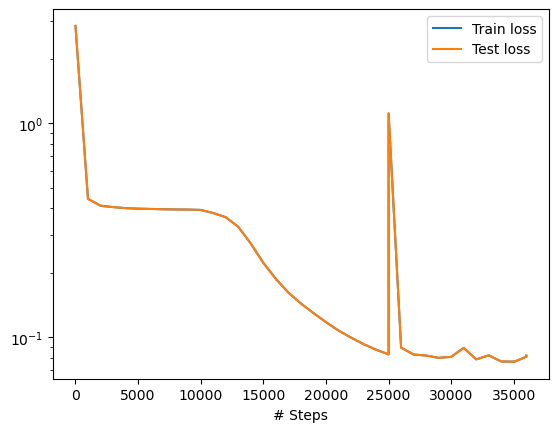

In [41]:
data2 = dde.data.TimePDE(
    geomtime, pde, [ic_u, ic_v], num_domain=50000, num_boundary=10000, num_test = 50000
)
checkpointer = dde.callbacks.ModelCheckpoint(
     "model/model", verbose=1, save_better_only=True
)
model2.compile("adam", lr=1e-3, loss_weights=[0,0,0,1,1])
losshistory, train_state = model2.train(epochs=1000, callbacks=[checkpointer,])
dde.saveplot(losshistory, train_state, issave=True, isplot=True)


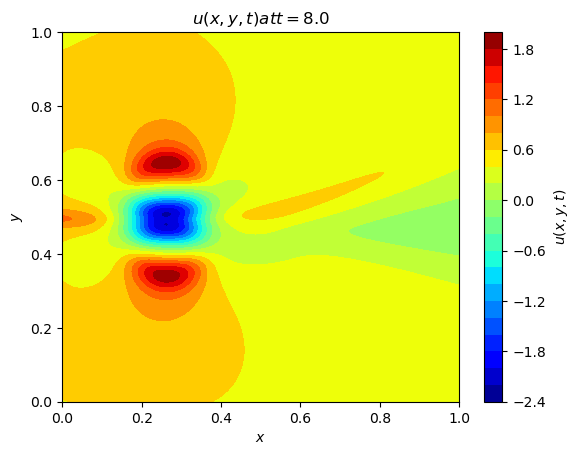

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Assuming you have a trained model
# Replace the following line with the actual model you have trained
# from your_model_file import model

# Example data (replace this with your actual data)
# X contains columns for x, y, and t
# Extracting x, y, t


# Create grid for plotting
x_unique = np.linspace(x_min, x_max, 1000)
y_unique = np.linspace(y_min, y_max, 1000)
XX_test, YY_test = np.meshgrid(x_unique, y_unique)

# Unique time steps
t_star = np.linspace(0,8, 80)

# Initialize plot
fig, ax = plt.subplots()

# Compute initial plot to determine color scale
X_test_initial = np.hstack((XX_test.flatten()[:, None], YY_test.flatten()[:, None], np.full((XX_test.size, 1), t_star[0])))
u_out_initial = model.predict(X_test_initial)[:, 0]
u_plot_initial = u_out_initial.reshape(XX_test.shape)

# Create initial plot and colorbar
cax = ax.contourf(XX_test, YY_test, u_plot_initial, levels=20, cmap='jet')
cbar = plt.colorbar(cax, ax=ax)
cbar.set_label(r'$u(x, y, t)$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_title(r'$u(x, y, t)$')

# Set consistent axis limits
ax.set_xlim([XX_test.min(), XX_test.max()])
ax.set_ylim([YY_test.min(), YY_test.max()])

def animate(i):
    ax.clear()
    current_t = t_star[i]
    X_test = np.hstack((XX_test.flatten()[:, None], YY_test.flatten()[:, None], np.full((XX_test.size, 1), current_t)))
    u_out = model.predict(X_test)[:, 0]
    u_plot = u_out.reshape(XX_test.shape)
    cax = ax.contourf(XX_test, YY_test, u_plot, levels=20, cmap='jet')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_title(f'$u(x, y, t) at t = {(current_t)}$')
    return cax.collections

# Create animation
ani = FuncAnimation(fig, animate, frames=len(t_star), interval=200, blit=True)

# Save animation
ani.save('u_h.gif', writer='imagemagick')

plt.show()


In [ ]:
len(t_star)

72

Compiling model...
'compile' took 1.557016 s

Restoring model from model3/model-49000.pt ...

Training model...



/users/eleves-b/2022/issame.maghraoui/.local/lib/python3.9/site-packages/deepxde/model.py:1096: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(save_pa

Step      Train loss                                            Test loss                                             Test metric
0         [5.56e-03, 2.71e-03, 5.10e-03, 2.42e-01, 5.23e-01]    [5.56e-03, 2.71e-03, 5.10e-03, 2.42e-01, 5.23e-01]    []  
Epoch 1: train loss improved from inf to 7.79e-01, saving model to model3/model-1.pt ...

1000      [1.25e-02, 6.74e-03, 1.25e-02, 2.21e-01, 5.09e-01]    [1.25e-02, 6.74e-03, 1.25e-02, 2.21e-01, 5.09e-01]    []  
Epoch 1000: train loss improved from 7.79e-01 to 7.62e-01, saving model to model3/model-1000.pt ...

2000      [1.33e-02, 7.27e-03, 1.36e-02, 2.17e-01, 5.06e-01]    [1.33e-02, 7.27e-03, 1.36e-02, 2.17e-01, 5.06e-01]    []  
Epoch 2000: train loss improved from 7.62e-01 to 7.58e-01, saving model to model3/model-2000.pt ...

3000      [1.38e-02, 7.72e-03, 1.41e-02, 2.14e-01, 5.04e-01]    [1.38e-02, 7.72e-03, 1.41e-02, 2.14e-01, 5.04e-01]    []  
Epoch 3000: train loss improved from 7.58e-01 to 7.54e-01, saving model to model3/mode

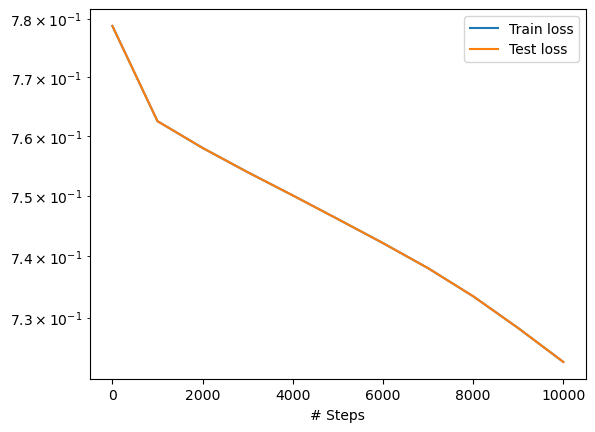

In [12]:
import deepxde as dde
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.animation as animation

nu = 0.0006
rho = 1.2

def pde(x, y):
    u, v, p = y[:, 0:1], y[:, 1:2], y[:, 2:3]
    u_t = dde.grad.jacobian(y, x, i=0, j=2)
    v_t = dde.grad.jacobian(y, x, i=1, j=2)
    u_x = dde.grad.jacobian(y, x, i=0, j=0)
    u_y = dde.grad.jacobian(y, x, i=0, j=1)
    v_x = dde.grad.jacobian(y, x, i=1, j=0)
    v_y = dde.grad.jacobian(y, x, i=1, j=1)
    u_xx = dde.grad.hessian(y, x, component=0, i=0, j=0)
    u_yy = dde.grad.hessian(y, x, component=0, i=1, j=1)
    v_xx = dde.grad.hessian(y, x, component=1, i=0, j=0)
    v_yy = dde.grad.hessian(y, x, component=1, i=1, j=1)
    p_x = dde.grad.jacobian(y, x, i=2, j=0)
    p_y = dde.grad.jacobian(y, x, i=2, j=1)

    f = rho*(u_t + u * u_x + v * u_y )+ p_x - nu * (u_xx + u_yy)
    g = rho*(v_t + u * v_x + v * v_y )+ p_y - nu * (v_xx + v_yy)
    h = u_x + v_y
    return [f, g, h]

N_train = 10000
step = x.shape[0] // N_train

idx = np.arange(0, step * N_train, step)

# Créer les ensembles d'entraînement
x_train = x[idx, :]
y_train = y[idx, :]
t_train = t[idx, :]
u_train = u[idx, :]
v_train = v[idx, :]


# Define geometry and time domain
geom = dde.geometry.Rectangle([x.min(), y.min()], [x.max(), y.max()])
timedomain = dde.geometry.TimeDomain(t.min(), t.max())
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

# Define boundary conditions
def boundary(_, on_boundary):
    return on_boundary

# Initial and boundary conditions
ic_u = dde.icbc.PointSetBC(np.hstack((x_train, y_train, t_train)), u_train, component=0)
ic_v = dde.icbc.PointSetBC(np.hstack((x_train, y_train, t_train)), v_train, component=1)

# Define the neural network
net = dde.maps.FNN([3] + [64]*4 + [3], "tanh", "Glorot normal")

# Define the model
data = dde.data.TimePDE(
    geomtime, pde, [ic_u, ic_v], num_domain=5000, num_boundary=10000
)
model = dde.Model(data, net)
checkpointer = dde.callbacks.ModelCheckpoint(
     "model3/model", verbose=1, save_better_only=True
)
# Compile and train the model
model.compile("adam", lr=1e-3, loss_weights=[0.5,0.5,0.5,1,1])

model.restore("model3/model-49000.pt", verbose=1)

losshistory, train_state = model.train(epochs=10000, callbacks=[checkpointer,])

#model.compile("L-BFGS")
#model.train()


dde.saveplot(losshistory, train_state, issave=True, isplot=True)




In [14]:
checkpointer = dde.callbacks.ModelCheckpoint(
     "model2/model", verbose=1, save_better_only=True
)
losshistory, train_state = model.train(epochs=200000, callbacks=[checkpointer,])
dde.saveplot(losshistory, train_state, issave=True, isplot=True)



Training model...

Step      Train loss                                            Test loss                                             Test metric
60000     [1.12e-02, 8.96e-03, 1.00e-02, 1.17e-01, 4.27e-01]    [1.12e-02, 8.96e-03, 1.00e-02, 1.17e-01, 4.27e-01]    []  
Epoch 60001: train loss improved from inf to 5.74e-01, saving model to model2/model-60001.pt ...

61000     [1.11e-02, 8.88e-03, 9.96e-03, 1.16e-01, 4.26e-01]    [1.11e-02, 8.88e-03, 9.96e-03, 1.16e-01, 4.26e-01]    []  
Epoch 61000: train loss improved from 5.74e-01 to 5.72e-01, saving model to model2/model-61000.pt ...

62000     [1.10e-02, 8.79e-03, 9.89e-03, 1.15e-01, 4.26e-01]    [1.10e-02, 8.79e-03, 9.89e-03, 1.15e-01, 4.26e-01]    []  
Epoch 62000: train loss improved from 5.72e-01 to 5.71e-01, saving model to model2/model-62000.pt ...

63000     [1.09e-02, 8.71e-03, 9.83e-03, 1.15e-01, 4.25e-01]    [1.09e-02, 8.71e-03, 9.83e-03, 1.15e-01, 4.25e-01]    []  
Epoch 63000: train loss improved from 5.71e-01 to 5.69e

Using backend: pytorch
Other supported backends: tensorflow.compat.v1, tensorflow, jax, paddle.
paddle supports more examples now and is recommended.


Compiling model...
'compile' took 1.662949 s

Restoring model from model4/model-10000.pt ...

Training model...



/users/eleves-b/2022/issame.maghraoui/.local/lib/python3.9/site-packages/deepxde/model.py:1096: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(save_pa

Step      Train loss                                            Test loss                                             Test metric
0         [1.34e-02, 5.80e-03, 1.27e-02, 2.32e-01, 5.15e-01]    [2.66e-02, 6.95e-03, 1.29e-02, 2.32e-01, 5.15e-01]    []  

Best model at step 0:
  train loss: 7.79e-01
  test loss: 7.93e-01
  test metric: []

'train' took 0.388614 s

Saving loss history to /users/eleves-b/2022/issame.maghraoui/PINNs/loss.dat ...
Saving training data to /users/eleves-b/2022/issame.maghraoui/PINNs/train.dat ...
Saving test data to /users/eleves-b/2022/issame.maghraoui/PINNs/test.dat ...


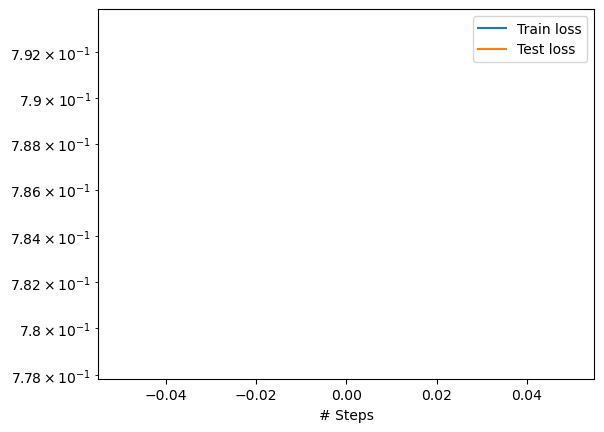

In [10]:
import deepxde as dde
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.animation as animation

nu = 0.0006
rho = 1.2

def pde(x, y):
    u, v, p = y[:, 0:1], y[:, 1:2], y[:, 2:3]
    u_t = dde.grad.jacobian(y, x, i=0, j=2)
    v_t = dde.grad.jacobian(y, x, i=1, j=2)
    u_x = dde.grad.jacobian(y, x, i=0, j=0)
    u_y = dde.grad.jacobian(y, x, i=0, j=1)
    v_x = dde.grad.jacobian(y, x, i=1, j=0)
    v_y = dde.grad.jacobian(y, x, i=1, j=1)
    u_xx = dde.grad.hessian(y, x, component=0, i=0, j=0)
    u_yy = dde.grad.hessian(y, x, component=0, i=1, j=1)
    v_xx = dde.grad.hessian(y, x, component=1, i=0, j=0)
    v_yy = dde.grad.hessian(y, x, component=1, i=1, j=1)
    p_x = dde.grad.jacobian(y, x, i=2, j=0)
    p_y = dde.grad.jacobian(y, x, i=2, j=1)

    f = rho*(u_t + u * u_x + v * u_y )+ p_x - nu * (u_xx + u_yy)
    g = rho*(v_t + u * v_x + v * v_y )+ p_y - nu * (v_xx + v_yy)
    h = u_x + v_y
    return [f, g, h]

N_train = 10000
step = x.shape[0] // N_train

idx = np.arange(0, step * N_train, step)

# Créer les ensembles d'entraînement
x_train = x[idx, :]
y_train = y[idx, :]
t_train = t[idx, :]
u_train = u[idx, :]
v_train = v[idx, :]


# Define geometry and time domain
geom = dde.geometry.Rectangle([x.min(), y.min()], [x.max(), y.max()])
timedomain = dde.geometry.TimeDomain(t.min(), t.max())
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

# Define boundary conditions
def boundary(_, on_boundary):
    return on_boundary

# Initial and boundary conditions
ic_u = dde.icbc.PointSetBC(np.hstack((x_train, y_train, t_train)), u_train, component=0)
ic_v = dde.icbc.PointSetBC(np.hstack((x_train, y_train, t_train)), v_train, component=1)

# Define the neural network
net = dde.maps.FNN([3] + [128]*6 + [3], "tanh", "Glorot normal")

# Define the model
data = dde.data.TimePDE(
    geomtime, pde, [ic_u, ic_v], num_domain=50000, num_boundary=10000,num_test = 50000
)
model = dde.Model(data, net)
checkpointer = dde.callbacks.ModelCheckpoint(
     "model4/model", verbose=1, save_better_only=True
)
# Compile and train the model
model.compile("adam", lr=1e-3, loss_weights=[0.5,0.5,0.5,1,1])

model.restore("model4/model-10000.pt", verbose = 1 )

losshistory, train_state = model.train(epochs=0, callbacks=[checkpointer,])

#model.compile("L-BFGS")
#model.train()


dde.saveplot(losshistory, train_state, issave=True, isplot=True)




**PFNNs**

In [13]:
import deepxde as dde
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.animation as animation

nu = 0.0006
rho = 1.2

def pde(x, y):
    u, v, p = y[:, 0:1], y[:, 1:2], y[:, 2:3]
    u_t = dde.grad.jacobian(y, x, i=0, j=2)
    v_t = dde.grad.jacobian(y, x, i=1, j=2)
    u_x = dde.grad.jacobian(y, x, i=0, j=0)
    u_y = dde.grad.jacobian(y, x, i=0, j=1)
    v_x = dde.grad.jacobian(y, x, i=1, j=0)
    v_y = dde.grad.jacobian(y, x, i=1, j=1)
    u_xx = dde.grad.hessian(y, x, component=0, i=0, j=0)
    u_yy = dde.grad.hessian(y, x, component=0, i=1, j=1)
    v_xx = dde.grad.hessian(y, x, component=1, i=0, j=0)
    v_yy = dde.grad.hessian(y, x, component=1, i=1, j=1)
    p_x = dde.grad.jacobian(y, x, i=2, j=0)
    p_y = dde.grad.jacobian(y, x, i=2, j=1)

    f = rho*(u_t + u * u_x + v * u_y )+ p_x - nu * (u_xx + u_yy)
    g = rho*(v_t + u * v_x + v * v_y )+ p_y - nu * (v_xx + v_yy)
    h = u_x + v_y
    return [f, g, h]

N_train = 10000
step = x.shape[0] // N_train

idx = np.arange(0, step * N_train, step)

# Créer les ensembles d'entraînement
x_train = x[idx, :]
y_train = y[idx, :]
t_train = t[idx, :]
u_train = u[idx, :]
v_train = v[idx, :]


# Define geometry and time domain
geom = dde.geometry.Rectangle([x.min(), y.min()], [x.max(), y.max()])
timedomain = dde.geometry.TimeDomain(t.min(), t.max())
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

# Define boundary conditions
def boundary(_, on_boundary):
    return on_boundary

# Initial and boundary conditions
ic_u = dde.icbc.PointSetBC(np.hstack((x_train, y_train, t_train)), u_train, component=0)
ic_v = dde.icbc.PointSetBC(np.hstack((x_train, y_train, t_train)), v_train, component=1)

# Define the parallel neural network
layer_sizes = [3, [64]*3, [64]*3,[64]*3,[64]*3,[64]*3, [64]*3, 3] # Example: 3 parallel networks for 3 outputs
activation = "tanh"
kernel_initializer = "Glorot normal"

net = dde.maps.PFNN(layer_sizes, activation, kernel_initializer)


# Define the model
data = dde.data.TimePDE(
    geomtime, pde, [ic_u, ic_v], num_domain=100000, num_boundary=10000,num_test = 100000
)
model = dde.Model(data, net)
checkpointer = dde.callbacks.ModelCheckpoint(
     "modelf/model", verbose=1, save_better_only=True
)
# Compile and train the model
model.compile("adam", lr=1e-3, loss_weights=[0.5,0.5,0.5,1,1])


losshistory, train_state = model.train(epochs=100000, callbacks=[checkpointer,])

model.compile("L-BFGS")
model.train()


dde.saveplot(losshistory, train_state, issave=True, isplot=True)




Compiling model...
'compile' took 0.000266 s

Training model...



OutOfMemoryError: CUDA out of memory. Tried to allocate 32.00 MiB. GPU 0 has a total capacity of 23.65 GiB of which 27.62 MiB is free. Process 37077 has 18.74 GiB memory in use. Including non-PyTorch memory, this process has 4.76 GiB memory in use. Of the allocated memory 4.35 GiB is allocated by PyTorch, and 169.78 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)